In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [34]:
voice_usage_info = pd.read_csv("data/VOICE_INCOMING_CALL_USAGE_ONNET.csv")

voice_usage_info

,event_source,event_source.hash,call_count,duration (seconds),ym,rtom_code,location_code,msan,equp_id,equp_index
0,112818394,c028faa94551392bb5820d9355b986a5,26,561.0,201908,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
1,372050595,235cbed1e48fc9f24b4714801fd35849,50,4847.0,201908,R-KLY,HZ-BRL-NODE,MSAG5200-ISL,47191,1
2,452287101,502dc489645005511c55b1d0eea775bb,2,243.0,201912,R-RN,BG-NODE,MSAG5200,43139,1
3,112818394,c028faa94551392bb5820d9355b986a5,9,142.0,201909,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
4,112769822,4b2e63f3edcb9ee2633d32edf895d787,27,4331.0,202006,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
...,...,...,...,...,...,...,...,...,...,...
32793,372050561,9c5b33b9d53d8f84a2ee95e4a2b63457,4,480.0,202007,R-KLY,HZ-BRL-NODE,MSAG5200-ISL,47191,1
32794,112725329,167671a939e03e258ca9cd94a3349a25,41,3516.0,202008,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,1
32795,112769007,9bab394af0f213327f3b26885b43e77b,4,360.0,201911,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
32796,112714199,9fb8b46719fb977ff1d99a786ba3937f,7,763.0,202007,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,1


In [35]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Call Count/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [36]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source.hash","ym"], keep="last")

voice_usage_info.shape

(32427, 10)

In [37]:
voice_usage_info = voice_usage_info.drop(['event_source'], axis=1)
voice_usage_info.rename(columns={'duration (seconds)': 'duration','ym':'year-month'}, inplace=True)
voice_usage_info

,event_source.hash,call_count,duration,year-month,rtom_code,location_code,msan,equp_id,equp_index
0,c028faa94551392bb5820d9355b986a5,26,561.0,201908,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
1,235cbed1e48fc9f24b4714801fd35849,50,4847.0,201908,R-KLY,HZ-BRL-NODE,MSAG5200-ISL,47191,1
2,502dc489645005511c55b1d0eea775bb,2,243.0,201912,R-RN,BG-NODE,MSAG5200,43139,1
3,c028faa94551392bb5820d9355b986a5,9,142.0,201909,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
4,4b2e63f3edcb9ee2633d32edf895d787,27,4331.0,202006,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
...,...,...,...,...,...,...,...,...,...
32793,9c5b33b9d53d8f84a2ee95e4a2b63457,4,480.0,202007,R-KLY,HZ-BRL-NODE,MSAG5200-ISL,47191,1
32794,167671a939e03e258ca9cd94a3349a25,41,3516.0,202008,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,1
32795,9bab394af0f213327f3b26885b43e77b,4,360.0,201911,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
32796,9fb8b46719fb977ff1d99a786ba3937f,7,763.0,202007,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,1


In [38]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0        26
1        50
2         2
3         9
4        27
         ..
32793     4
32794    41
32795     4
32796     7
32797     2
Name: call_count, Length: 32427, dtype: int64

In [39]:
voice_usage_info.isnull().sum(axis=0)

event_source.hash    0
call_count           0
duration             0
year-month           0
rtom_code            0
location_code        0
msan                 0
equp_id              0
equp_index           0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Call Count/Duration
- 3. Usage Rank
- 4. Labling usage

In [40]:
voice_usage = voice_usage_info[['event_source.hash','call_count','duration','year-month']]
voice_usage


,event_source.hash,call_count,duration,year-month
0,c028faa94551392bb5820d9355b986a5,26,561.0,201908
1,235cbed1e48fc9f24b4714801fd35849,50,4847.0,201908
2,502dc489645005511c55b1d0eea775bb,2,243.0,201912
3,c028faa94551392bb5820d9355b986a5,9,142.0,201909
4,4b2e63f3edcb9ee2633d32edf895d787,27,4331.0,202006
...,...,...,...,...
32793,9c5b33b9d53d8f84a2ee95e4a2b63457,4,480.0,202007
32794,167671a939e03e258ca9cd94a3349a25,41,3516.0,202008
32795,9bab394af0f213327f3b26885b43e77b,4,360.0,201911
32796,9fb8b46719fb977ff1d99a786ba3937f,7,763.0,202007


In [41]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                              \
year-month                           201908 201909 201910 201911 201912   
event_source.hash                                                         
00221451f705ebe26051158bb14f567a          6      1      2      1      2   
002fb47f60400713c854b0f69ff78c0a          1      1      3      9      2   
00567a4a3c474aca1ce5cd6570648932          0      0      2      0      0   
006be321aad541ff1d6c32a43dd7cdde         10      5     16      7     23   
00724ae2470df1ed0fe919800d02517d          0      0      0      0      0   
...                                     ...    ...    ...    ...    ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2          4     11      9     32      8   
ffb63ff99cf1354dff1da862f379da80         46     70     48     71     44   
ffd697d66cc01c8897ce3e37d693673a          3      7      3      0      0   
ffd96f173d6cd683bf3384bdc2f99713         25     18     27     22     27   
ffee845c0caa320b55e31bb156827d16          9      6      2      4      1   

                                                                     ...  \
year-month                       202001 202002 202003 202004 202005  ...   
event_source.hash                                                    ...   
00221451f705ebe26051158bb14f567a      4      6      2      0      1  ...   
002fb47f60400713c854b0f69ff78c0a      6      5      5      8      7  ...   
00567a4a3c474aca1ce5cd6570648932      0      0      0      0      0  ...   
006be321aad541ff1d6c32a43dd7cdde     11      6     14      6      6  ...   
00724ae2470df1ed0fe919800d02517d      0      0      0      0      0  ...   
...                                 ...    ...    ...    ...    ...  ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2     14      6      2      0      1  ...   
ffb63ff99cf1354dff1da862f379da80     54     24     21      8     14  ...   
ffd697d66cc01c8897ce3e37d693673a      0      0      0      0      0  ...   
ffd96f173d6cd683bf3384bdc2f99713     22     16     64     53     31  ...   
ffee845c0caa320b55e31bb156827d16     17     18     37     54      7  ...   

                                 duration                                     \
year-month                         201911 201912 202001 202002 202003 202004   
event_source.hash                                                              
00221451f705ebe26051158bb14f567a       14     74     80    368     70      0   
002fb47f60400713c854b0f69ff78c0a     2042    500   1744   1560   3140   1993   
00567a4a3c474aca1ce5cd6570648932        0      0      0      0      0      0   
006be321aad541ff1d6c32a43dd7cdde     5760  10558   3718   4008   8465   4720   
00724ae2470df1ed0fe919800d02517d        0      0      0      0      0      0   
...                                   ...    ...    ...    ...    ...    ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2    17526   6477  14409   6407   2969      0   
ffb63ff99cf1354dff1da862f379da80     6314   3259   3476   1451   1360    945   
ffd697d66cc01c8897ce3e37d693673a        0      0      0      0      0      0   
ffd96f173d6cd683bf3384bdc2f99713     3969   6588   4015   1833  10585   9217   
ffee845c0caa320b55e31bb156827d16     1891     60   1200   1080   4287   8349   

                                                              
year-month                       202005 202006 202007 202008  
event_source.hash                                             
00221451f705ebe26051158bb14f567a     60      0    310     19  
002fb47f60400713c854b0f69ff78c0a   1920   2513   1527   1207  
00567a4a3c474aca1ce5cd6570648932      0      0      0      0  
006be321aad541ff1d6c32a43dd7cdde   2834   3795   5681   4898  
00724ae2470df1ed0fe919800d02517d      0      0      0   1484  
...                                 ...    ...    ...    ...  
ffb4fa6778bc5b3d9c858f5f4fa1e0c2     60      0      0      0  
ffb63ff99cf1354dff1da862f379da80   1045   3294   2873   2231  
ffd697d66cc01c8897ce3e37d693673a      0      0      0      0  
ffd96f173d6cd683bf3384bdc2f99713   4991 

In [42]:
# check for all zero cols
pivot_voice_usage_info.loc[pivot_voice_usage_info.index == 0.0]

Empty DataFrame
Columns: [(call_count, 201908), (call_count, 201909), (call_count, 201910), (call_count, 201911), (call_count, 201912), (call_count, 202001), (call_count, 202002), (call_count, 202003), (call_count, 202004), (call_count, 202005), (call_count, 202006), (call_count, 202007), (call_count, 202008), (duration, 201908), (duration, 201909), (duration, 201910), (duration, 201911), (duration, 201912), (duration, 202001), (duration, 202002), (duration, 202003), (duration, 202004), (duration, 202005), (duration, 202006), (duration, 202007), (duration, 202008)]
Index: []

[0 rows x 26 columns]

In [43]:
pivot_voice_usage_info.columns

MultiIndex([('call_count', 201908),
            ('call_count', 201909),
            ('call_count', 201910),
            ('call_count', 201911),
            ('call_count', 201912),
            ('call_count', 202001),
            ('call_count', 202002),
            ('call_count', 202003),
            ('call_count', 202004),
            ('call_count', 202005),
            ('call_count', 202006),
            ('call_count', 202007),
            ('call_count', 202008),
            (  'duration', 201908),
            (  'duration', 201909),
            (  'duration', 201910),
            (  'duration', 201911),
            (  'duration', 201912),
            (  'duration', 202001),
            (  'duration', 202002),
            (  'duration', 202003),
            (  'duration', 202004),
            (  'duration', 202005),
            (  'duration', 202006),
            (  'duration', 202007),
            (  'duration', 202008)],
           names=[None, 'year-month'])

In [44]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,call_count,duration,year-month
count,32427.00000,32427.00000,32427.00000
mean,31.43439,4689.88938,201967.73874
std,144.07306,16137.82189,46.11390
min,1.00000,1.00000,201908.00000
25%,4.00000,388.00000,201911.00000
50%,10.00000,1542.00000,202002.00000
75%,26.00000,4500.00000,202005.00000
max,6890.00000,700042.00000,202008.00000


In [45]:
# binning call_count
count_bins = [0, 6,15, 30, 100,1200,2400,4800,6890]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-45-1a3cb312abcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,1,1,1,1,1,1,1,1,0,1,0,1,1
002fb47f60400713c854b0f69ff78c0a,1,1,1,2,1,1,1,1,2,2,1,1,1
00567a4a3c474aca1ce5cd6570648932,0,0,1,0,0,0,0,0,0,0,0,0,0
006be321aad541ff1d6c32a43dd7cdde,2,1,3,2,3,2,1,2,1,1,1,2,1
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,1,2,2,4,2,2,1,1,0,1,0,0,0
ffb63ff99cf1354dff1da862f379da80,4,4,4,4,4,4,3,3,2,2,3,4,3
ffd697d66cc01c8897ce3e37d693673a,1,2,1,0,0,0,0,0,0,0,0,0,0


In [46]:
# binning duration
duration_bins = [0, 300, 1500, 4200,16800,33600,66000,240000,700042]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-46-205fd79ce0cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,1,1,1,1,1,1,2,1,0,1,0,2,1
002fb47f60400713c854b0f69ff78c0a,2,1,2,3,2,3,3,3,3,3,3,3,2
00567a4a3c474aca1ce5cd6570648932,0,0,1,0,0,0,0,0,0,0,0,0,0
006be321aad541ff1d6c32a43dd7cdde,4,3,4,4,4,3,3,4,4,3,3,4,4
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,2,3,4,5,4,4,4,3,0,1,0,0,0
ffb63ff99cf1354dff1da862f379da80,3,4,3,4,3,3,2,2,2,2,3,3,3
ffd697d66cc01c8897ce3e37d693673a,1,1,1,0,0,0,0,0,0,0,0,0,0


In [47]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [48]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

## ToDO
- find a different approach other than product

### Justification
- https://www.researchgate.net/post/Can-I-combine-2-independent-variable-as-one-variable-in-a-model-Can-I-still-include-the-individual-variable-in-the-same-model-after-combing-the-two
- http://www.utstat.toronto.edu/~brunner/DataAnalysisText/Interactions.pdf

### More advanced methods
- Dimension reduction approaches?

### Usage ratings for year-month

In [49]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,,
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,1,1,1,1,1,1,2,1,0,1,0,2,1
002fb47f60400713c854b0f69ff78c0a,2,1,2,6,2,3,3,3,6,6,3,3,2
00567a4a3c474aca1ce5cd6570648932,0,0,1,0,0,0,0,0,0,0,0,0,0
006be321aad541ff1d6c32a43dd7cdde,8,3,12,8,12,6,3,8,4,3,3,8,4
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,2,6,8,20,8,8,4,3,0,1,0,0,0
ffb63ff99cf1354dff1da862f379da80,12,16,12,16,12,12,6,6,4,4,9,12,9


In [50]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [51]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))

<AxesSubplot:xlabel='year-month', ylabel='event_source.hash'>

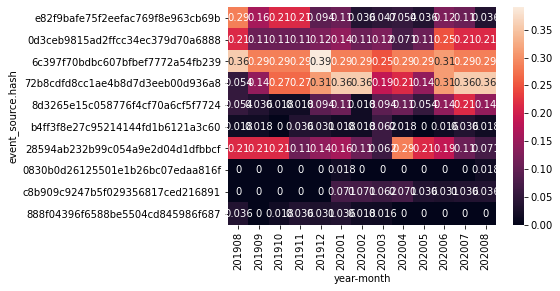

In [52]:
sns.heatmap(pivot_voice_usage_info[year_month_list].sample(n=10), annot=True )

In [53]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
event_source.hash,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.017857,0.017857,0.017857,0.017857,0.015625,0.017857,0.035714,0.015625,0.000000,0.017857,0.000000,0.035714,0.017857,0.017514
002fb47f60400713c854b0f69ff78c0a,0.035714,0.017857,0.035714,0.107143,0.031250,0.053571,0.053571,0.046875,0.107143,0.107143,0.046875,0.053571,0.035714,0.056319
00567a4a3c474aca1ce5cd6570648932,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001374
006be321aad541ff1d6c32a43dd7cdde,0.142857,0.053571,0.214286,0.142857,0.187500,0.107143,0.053571,0.125000,0.071429,0.053571,0.046875,0.142857,0.071429,0.108688
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.002747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.035714,0.107143,0.142857,0.357143,0.125000,0.142857,0.071429,0.046875,0.000000,0.017857,0.000000,0.000000,0.000000,0.080529
ffb63ff99cf1354dff1da862f379da80,0.214286,0.285714,0.214286,0.285714,0.187500,0.214286,0.107143,0.093750,0.071429,0.071429,0.140625,0.214286,0.160714,0.173935
ffd697d66cc01c8897ce3e37d693673a,0.017857,0.035714,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005495


### Finding Outliers

<AxesSubplot:>

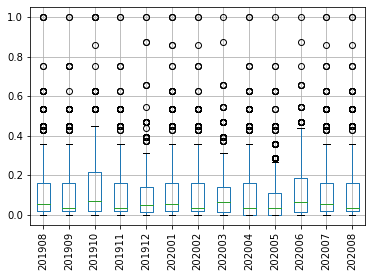

In [54]:
pivot_voice_usage_info.boxplot(column=[int(x) for x in year_month_list], rot=90)

<AxesSubplot:ylabel='year-month'>

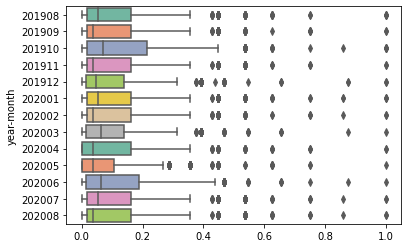

In [55]:
ax = sns.boxplot(data=pivot_voice_usage_info[[int(x) for x in year_month_list]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

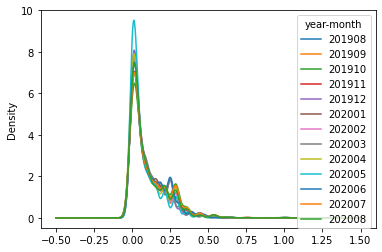

In [56]:
pivot_voice_usage_info[[int(x) for x in year_month_list]].plot(kind = 'density')

## Three quantitative methods commonly used in statistics for the detection of univariate outliers:
- Tukey’s box plot method
- Internally studentized residuals (AKA z-score method)
- Median Absolute Deviation method

### 1) Tukey’s box plot method
- Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.    
    
- IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile
- Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]
- Outer fence = [Q1–3*IQR, Q3+3*IQR]

In [57]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    outliers_prob_indexes = []
    outliers_poss_indexes = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob_indexes.append(index)
            outliers_prob.append(x)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss_indexes.append(index)
            outliers_poss.append(x)
    # returns indexes of the rows with outliers
    return outliers_prob, outliers_prob_indexes, outliers_poss, outliers_poss_indexes

In [58]:
pr_col_threshold = []
po_col_threshold = []
for col in year_month_list:
    pr_col, pr_col_indexes, po_col, po_col_indexes = tukeys_method(pivot_voice_usage_info, int(col))
    pr_col_threshold.append({col: {"threshold": min(pr_col), "count": len(pr_col)}})
    po_col_threshold.append({col: {"threshold": min(po_col), "count": len(po_col)}})
    print()
    print(f"Probable Outliers for {col}---->\n", pr_col)
    print(len(pr_col))
    print()
    print(f"Possible Outliers for {col}----->\n", po_col)
    print(len(po_col))
    print()


Probable Outliers for 201908---->
 [1.0, 0.75, 0.625, 1.0, 1.0, 0.625, 1.0, 0.625, 0.75, 0.625, 0.625, 0.625, 0.625]
13

Possible Outliers for 201908----->
 [1.0, 0.5357142857142857, 0.4464285714285714, 0.4464285714285714, 0.4464285714285714, 0.5357142857142857, 0.42857142857142855, 0.75, 0.5357142857142857, 0.4464285714285714, 0.4464285714285714, 0.42857142857142855, 0.4464285714285714, 0.4464285714285714, 0.42857142857142855, 0.4464285714285714, 0.4464285714285714, 0.4464285714285714, 0.625, 0.4464285714285714, 0.4464285714285714, 0.4464285714285714, 0.4464285714285714, 0.5357142857142857, 0.4464285714285714, 0.4464285714285714, 0.5357142857142857, 0.5357142857142857, 0.4464285714285714, 1.0, 0.42857142857142855, 0.42857142857142855, 0.5357142857142857, 0.5357142857142857, 0.5357142857142857, 0.4464285714285714, 1.0, 0.4464285714285714, 0.4464285714285714, 0.5357142857142857, 0.5357142857142857, 0.5357142857142857, 0.42857142857142855, 0.625, 1.0, 0.625, 0.42857142857142855, 0.53571

In [59]:
pr_col_threshold

[{201908: {'threshold': 0.625, 'count': 13}},
 {201909: {'threshold': 0.625, 'count': 8}},
 {201910: {'threshold': 0.8571428571428571, 'count': 6}},
 {201911: {'threshold': 0.625, 'count': 8}},
 {201912: {'threshold': 0.546875, 'count': 8}},
 {202001: {'threshold': 0.625, 'count': 14}},
 {202002: {'threshold': 0.625, 'count': 8}},
 {202003: {'threshold': 0.546875, 'count': 11}},
 {202004: {'threshold': 0.75, 'count': 5}},
 {202005: {'threshold': 0.42857142857142855, 'count': 39}},
 {202006: {'threshold': 0.75, 'count': 3}},
 {202007: {'threshold': 0.625, 'count': 12}},
 {202008: {'threshold': 0.625, 'count': 13}}]

In [60]:
po_col_threshold

[{201908: {'threshold': 0.42857142857142855, 'count': 82}},
 {201909: {'threshold': 0.42857142857142855, 'count': 66}},
 {201910: {'threshold': 0.5357142857142857, 'count': 44}},
 {201911: {'threshold': 0.42857142857142855, 'count': 66}},
 {201912: {'threshold': 0.375, 'count': 83}},
 {202001: {'threshold': 0.42857142857142855, 'count': 80}},
 {202002: {'threshold': 0.42857142857142855, 'count': 69}},
 {202003: {'threshold': 0.375, 'count': 73}},
 {202004: {'threshold': 0.42857142857142855, 'count': 48}},
 {202005: {'threshold': 0.26785714285714285, 'count': 252}},
 {202006: {'threshold': 0.46875, 'count': 44}},
 {202007: {'threshold': 0.42857142857142855, 'count': 84}},
 {202008: {'threshold': 0.42857142857142855, 'count': 68}}]

### 2) Median Absolute Deviation method
- this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is dependent on other outliers as every observation directly affects the mean.    
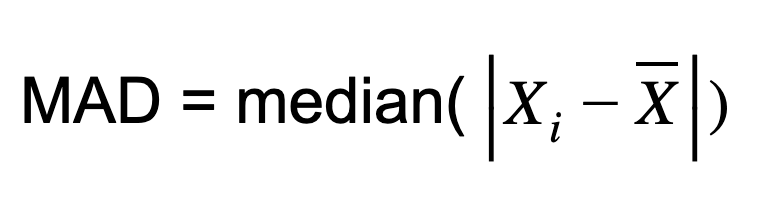

In [61]:
from scipy import stats

# MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [62]:
col_threshold = []
for col in year_month_list:
    outliers = mad_method(pivot_voice_usage_info, int(col))
    outlier_cols = pivot_voice_usage_info[int(col)].iloc[outliers]
    col_threshold.append({col: {"threshold" :min(outlier_cols), "count":len(outliers)}})
    print()
    print(f"Outliers for {col}---->\n", outlier_cols)
    print(len(outliers))


Outliers for 201908---->
 event_source.hash
03d189e698bac53767b82645f582d574    1.000000
048f304256dc532c9aa79b434ab5ee2e    0.357143
063f3be0a6af9f777434429112257c03    0.357143
068b2396c4322ce07b969d691d7f4a17    0.357143
06b93cc32b6bfdbc24ab9c6df1da3d0b    0.535714
                                      ...   
f937cc06caf1660ee9ed382a510a6688    0.357143
fc2acc0f6df2eefbcd3f28e20be73396    0.446429
fc9f73eca9b4fdcfd714154b613b5917    0.446429
fdf1cca1f96ccf2fdf7426b6bd74309e    0.446429
ff1093d5ef61bf46f8c88e9b7614e311    0.446429
Name: 201908, Length: 166, dtype: float64
166

Outliers for 201909---->
 event_source.hash
009f305bf85a71012c0e343233e611ba    0.750000
03d189e698bac53767b82645f582d574    0.750000
06b93cc32b6bfdbc24ab9c6df1da3d0b    0.535714
09d43def1267d000b4cad013f66f74e4    0.357143
0bbd7730f751b9c26a618e887add0530    0.446429
                                      ...   
f6f97a90a742d6f3ee157c9e519c7242    0.357143
f79c3ea7407efa13249ce64d86463168    0.357143
fc2acc0f6

<ipython-input-61-ab658f4f8d27>:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad = np.abs(stats.median_absolute_deviation(df))


In [63]:
col_threshold

[{201908: {'threshold': 0.3571428571428571, 'count': 166}},
 {201909: {'threshold': 0.3571428571428571, 'count': 129}},
 {201910: {'threshold': 0.3571428571428571, 'count': 201}},
 {201911: {'threshold': 0.3571428571428571, 'count': 133}},
 {201912: {'threshold': 0.3125, 'count': 152}},
 {202001: {'threshold': 0.3571428571428571, 'count': 167}},
 {202002: {'threshold': 0.3571428571428571, 'count': 142}},
 {202003: {'threshold': 0.3125, 'count': 162}},
 {202004: {'threshold': 0.3571428571428571, 'count': 142}},
 {202005: {'threshold': 0.3571428571428571, 'count': 83}},
 {202006: {'threshold': 0.3125, 'count': 221}},
 {202007: {'threshold': 0.3571428571428571, 'count': 177}},
 {202008: {'threshold': 0.3571428571428571, 'count': 147}}]

In [64]:
sum_outlier = 0
for col in col_threshold:
    for key,val in col.items():
        sum_outlier += val["threshold"]
avg_outlier = sum_outlier / len(col_threshold)
pivot_voice_usage_info["Outlier"]=pivot_voice_usage_info.apply(lambda x : "YES" if x["Usage_Rating_Scaled"]> avg_outlier else "NO", axis=1)
print(avg_outlier)

0.34684065934065933


In [65]:
pivot_voice_usage_info.describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
count,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000
mean,0.102977,0.090704,0.112562,0.096702,0.089786,0.103826,0.092944,0.091592,0.092657,0.074635,0.100051,0.105802,0.097563,0.096292
std,0.121590,0.112768,0.128305,0.115184,0.106136,0.122238,0.113709,0.104709,0.115430,0.100173,0.113033,0.123355,0.118075,0.103855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001202
25%,0.017857,0.017857,0.017857,0.017857,0.015625,0.017857,0.017857,0.015625,0.000000,0.000000,0.015625,0.017857,0.017857,0.017170
50%,0.053571,0.035714,0.071429,0.035714,0.046875,0.053571,0.035714,0.062500,0.035714,0.035714,0.062500,0.053571,0.035714,0.058036
75%,0.160714,0.160714,0.214286,0.160714,0.140625,0.160714,0.160714,0.140625,0.160714,0.107143,0.187500,0.160714,0.160714,0.147708
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
# labling usage bins
bins = [0, 0.08, 0.3,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.017857,0.017857,0.017857,0.017857,0.015625,0.017857,0.035714,0.015625,0.000000,0.017857,0.000000,0.035714,0.017857,0.017514,NO,LOW
002fb47f60400713c854b0f69ff78c0a,0.035714,0.017857,0.035714,0.107143,0.031250,0.053571,0.053571,0.046875,0.107143,0.107143,0.046875,0.053571,0.035714,0.056319,NO,LOW
00567a4a3c474aca1ce5cd6570648932,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001374,NO,LOW
006be321aad541ff1d6c32a43dd7cdde,0.142857,0.053571,0.214286,0.142857,0.187500,0.107143,0.053571,0.125000,0.071429,0.053571,0.046875,0.142857,0.071429,0.108688,NO,MEDIUM
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.002747,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.035714,0.107143,0.142857,0.357143,0.125000,0.142857,0.071429,0.046875,0.000000,0.017857,0.000000,0.000000,0.000000,0.080529,NO,MEDIUM
ffb63ff99cf1354dff1da862f379da80,0.214286,0.285714,0.214286,0.285714,0.187500,0.214286,0.107143,0.093750,0.071429,0.071429,0.140625,0.214286,0.160714,0.173935,NO,MEDIUM
ffd697d66cc01c8897ce3e37d693673a,0.017857,0.035714,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005495,NO,LOW


In [67]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [68]:
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.017857,0.017857,0.017857,0.017857,0.015625,0.017857,0.035714,0.015625,0.000000,0.017857,0.000000,0.035714,0.017857,0.017514,NO,LOW
002fb47f60400713c854b0f69ff78c0a,0.035714,0.017857,0.035714,0.107143,0.031250,0.053571,0.053571,0.046875,0.107143,0.107143,0.046875,0.053571,0.035714,0.056319,NO,LOW
00567a4a3c474aca1ce5cd6570648932,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001374,NO,LOW
006be321aad541ff1d6c32a43dd7cdde,0.142857,0.053571,0.214286,0.142857,0.187500,0.107143,0.053571,0.125000,0.071429,0.053571,0.046875,0.142857,0.071429,0.108688,NO,MEDIUM
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.002747,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.035714,0.107143,0.142857,0.357143,0.125000,0.142857,0.071429,0.046875,0.000000,0.017857,0.000000,0.000000,0.000000,0.080529,NO,MEDIUM
ffb63ff99cf1354dff1da862f379da80,0.214286,0.285714,0.214286,0.285714,0.187500,0.214286,0.107143,0.093750,0.071429,0.071429,0.140625,0.214286,0.160714,0.173935,NO,MEDIUM
ffd697d66cc01c8897ce3e37d693673a,0.017857,0.035714,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005495,NO,LOW


In [69]:
pivot_voice_usage_info.to_csv("data/user_profile/VOICE_ONNET_INCOMING_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [89]:
# bucketing by location
voice_location_info = voice_usage_info
voice_location_info['Location_Identifier'] = voice_location_info['msan'].astype(str)+ voice_location_info['location_code'].astype(str) +voice_location_info['equp_id'].astype(str) +voice_location_info['equp_index'].astype(str)
voice_location_info

,event_source.hash,call_count,duration,year-month,rtom_code,location_code,msan,equp_id,equp_index,Location_Identifier
0,c028faa94551392bb5820d9355b986a5,26,561.0,201908,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1,MSAG5200-ISLND-PHG-NODE500241
1,235cbed1e48fc9f24b4714801fd35849,50,4847.0,201908,R-KLY,HZ-BRL-NODE,MSAG5200-ISL,47191,1,MSAG5200-ISLHZ-BRL-NODE471911
2,502dc489645005511c55b1d0eea775bb,2,243.0,201912,R-RN,BG-NODE,MSAG5200,43139,1,MSAG5200BG-NODE431391
3,c028faa94551392bb5820d9355b986a5,9,142.0,201909,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1,MSAG5200-ISLND-PHG-NODE500241
4,4b2e63f3edcb9ee2633d32edf895d787,27,4331.0,202006,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1,MSAG5200-ISLND-PHG-NODE500241
...,...,...,...,...,...,...,...,...,...,...
32793,9c5b33b9d53d8f84a2ee95e4a2b63457,4,480.0,202007,R-KLY,HZ-BRL-NODE,MSAG5200-ISL,47191,1,MSAG5200-ISLHZ-BRL-NODE471911
32794,167671a939e03e258ca9cd94a3349a25,41,3516.0,202008,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,1,MSAG5200-ISLMV-GDM-NODE482491
32795,9bab394af0f213327f3b26885b43e77b,4,360.0,201911,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1,MSAG5200-ISLND-PHG-NODE500241
32796,9fb8b46719fb977ff1d99a786ba3937f,7,763.0,202007,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,1,MSAG5200-ISLMV-GDM-NODE482491


In [90]:
voice_location_info = voice_location_info.drop_duplicates("event_source.hash", keep="last")
voice_location_info.shape

(3236, 10)

In [91]:
user_location = voice_location_info[['event_source.hash','Location_Identifier']]
user_location

,event_source.hash,Location_Identifier
39,744ba1408591cbca8fc57690af62c841,MSAG5200-ISLWI-NWT-NODE485201
141,05be9be55a8a24c5ee0a7004f04e53f3,UA5000(IPMB)SL-NODE385341
174,93ccbb21b5813c61d681c1c64963b241,MSAG5200-ISLND-PHG-NODE500241
179,355a795e5bd90e15b03ca3b466c25b6e,UA5000(IPMB)SL-NODE385341
182,d96f278929ac24f5ce5cfb27eaedb22b,MSAG5200-ISLND-PHG-NODE500241
...,...,...
32765,b12be81bb66614f327413c145d4cc59d,MSAG5200-ISLMV-GDM-NODE482491
32794,167671a939e03e258ca9cd94a3349a25,MSAG5200-ISLMV-GDM-NODE482491
32795,9bab394af0f213327f3b26885b43e77b,MSAG5200-ISLND-PHG-NODE500241
32796,9fb8b46719fb977ff1d99a786ba3937f,MSAG5200-ISLMV-GDM-NODE482491


In [92]:
user_location.to_csv("data/user_profile/VOICE_ONNET_INCOMING_Locations_of_Users.csv")

In [93]:
voice_location_info["User_Count"] = 1
voice_gropued_by_locations = voice_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
voice_gropued_by_locations = voice_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-93-46e54884d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_location_info["User_Count"] = 1


In [94]:
voice_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,14
1,C300MHT-NE-NODE8152461,16
2,C300MIDH-IDJ-NODE11065541,59
3,C300MKI-NODE10668164,90
4,C300MNW-MEE-NODE18887751,183
5,C300MPDT-NODE13379431,12
6,C300MTP-NODE8700911,21
7,C300MVH-NODE9874041,16
8,MA5603TAD-SRV-NODE10224991,7
9,MSAG5200-ISLBZ-NODE435881,158


In [95]:
voice_gropued_by_locations.to_csv("data/user_profile/VOICE_ONNET_INCOMING_Users_by_location.csv")

<AxesSubplot:>

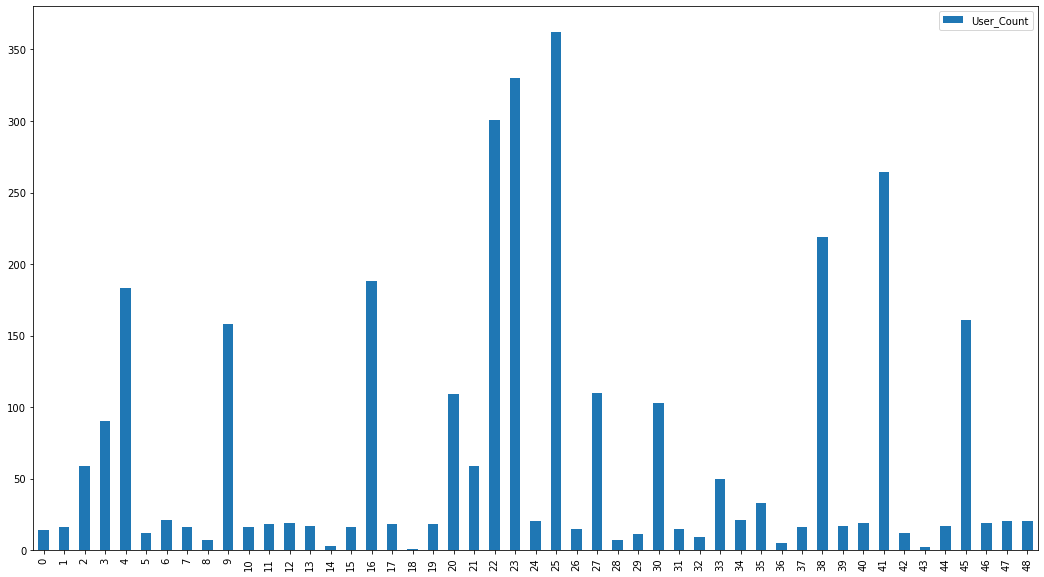

In [96]:
voice_gropued_by_locations.plot(kind="bar", figsize=(18,10),xticks=voice_gropued_by_locations.index)